In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 연령별 건강보험적용대상자 1인당 진료현황 - medi_cost

In [5]:
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/건강보험진료통계/건강보험진료통계-연령별건강보험적용대상자1인당진료현황_2022.xlsx'

medi_cost = pd.read_excel(path, engine='openpyxl')
# 첫 번째 행을 컬럼으로 지정
new_columns = medi_cost.iloc[1].values
medi_cost.columns = new_columns
medi_cost = medi_cost.drop([0, 1])
medi_cost = medi_cost.reset_index(drop=True)

medi_cost

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구분,건강보험 적용대상자(천명),요양급여비용(억원),진료일수(천일),1인당 진료일수(일),1인당 진료비(원)
0,전체,51410,1029770,1062596,20.67,2003055
1,0세,246,9208,7184,29.21,3744422
2,1~4세,1193,17442,37963,31.82,1462004
3,5~9세,2098,19511,36554,17.42,930005
4,10~14세,2321,16700,27116,11.68,719585
5,15~19세,2298,16239,25827,11.24,706544
6,20~24세,3005,22320,30252,10.07,742823
7,25~29세,3621,31148,39749,10.98,860237
8,30~34세,3483,37226,42988,12.34,1068671
9,35~39세,3439,41097,46698,13.58,1194943


### 구분별 1인당 진료비용

In [6]:
!sudo apt-get install -y fonts-nanum # 폰트 설치
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

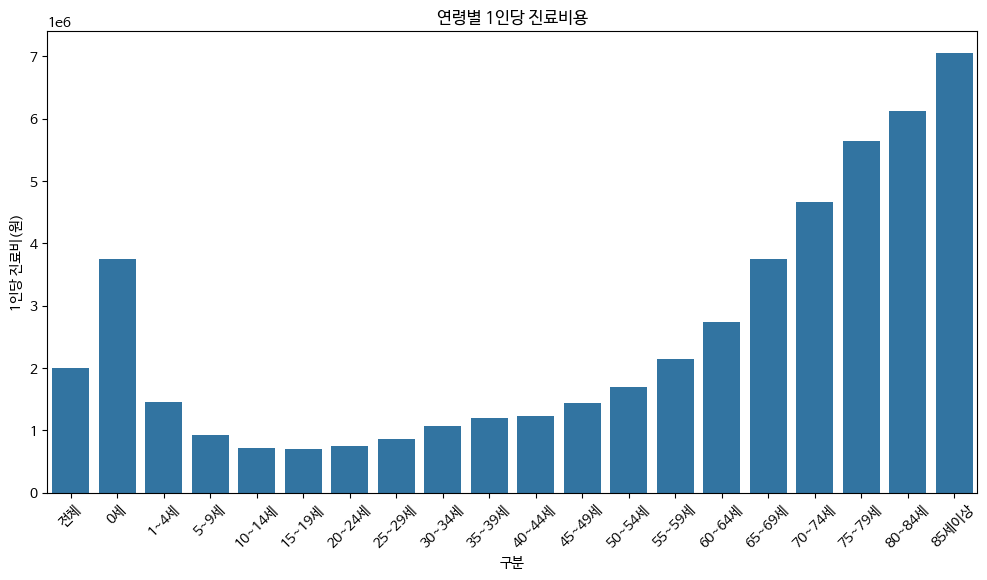

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.barplot(data=medi_cost, x='구분', y='1인당 진료비(원)')
plt.xticks(rotation=45)
plt.title('연령별 1인당 진료비용')
plt.show()

## 3. 입원 외래별 노인진료 청구현황 - senior

In [8]:
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/건강보험진료통계/건강보험진료통계-입원외래별노인진료청구현황_2022.xlsx'

senior = pd.read_excel(path, engine='openpyxl')

new_columns = senior.iloc[1].values
senior.columns = new_columns
senior = senior.drop([0, 1])
senior = senior.reset_index(drop=True)

senior

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구분,단위,입원외래구분,2018년,2019년,2020년,2021년,2022년
0,청구건수,(천건),전체,406496,425198,406936,413945,449822
1,청구건수,(천건),입원,7075,7269,7273,7375,8323
2,청구건수,(천건),외래,399421,417929,399663,406570,441499
3,입(내)원일수,(천일),전체,485618,504799,485299,490550,526422
4,입(내)원일수,(천일),입원,86927,87588,86459,84893,85882
5,입(내)원일수,(천일),외래,398690,417211,398840,405658,440540
6,진료인원,(천명),전체,7178,7520,7930,8341,8841
7,진료인원,(천명),입원,1976,2050,1990,2064,2202
8,진료인원,(천명),외래,7055,7394,7785,8197,8716
9,요양급여비용,(억원),전체,311173,347251,365320,396491,432348


### 외래 데이터만 출력

In [9]:
df=senior[senior['입원외래구분'] == '외래']
df = df.reset_index(drop=True)
display(df)

,구분,단위,입원외래구분,2018년,2019년,2020년,2021년,2022년
0,청구건수,(천건),외래,399421,417929,399663,406570,441499
1,입(내)원일수,(천일),외래,398690,417211,398840,405658,440540
2,진료인원,(천명),외래,7055,7394,7785,8197,8716
3,요양급여비용,(억원),외래,166523,188183,197656,218272,247925
4,보험자부담금,(억원),외래,122477,138860,145824,160380,181276
5,건당입(내)원일수,(일),외래,1,1,1,1,1
6,건당진료비,(원),외래,41691,45028,49456,53686,56155
7,입(내)원일당진료비,(원),외래,41767,45105,49558,53807,56277


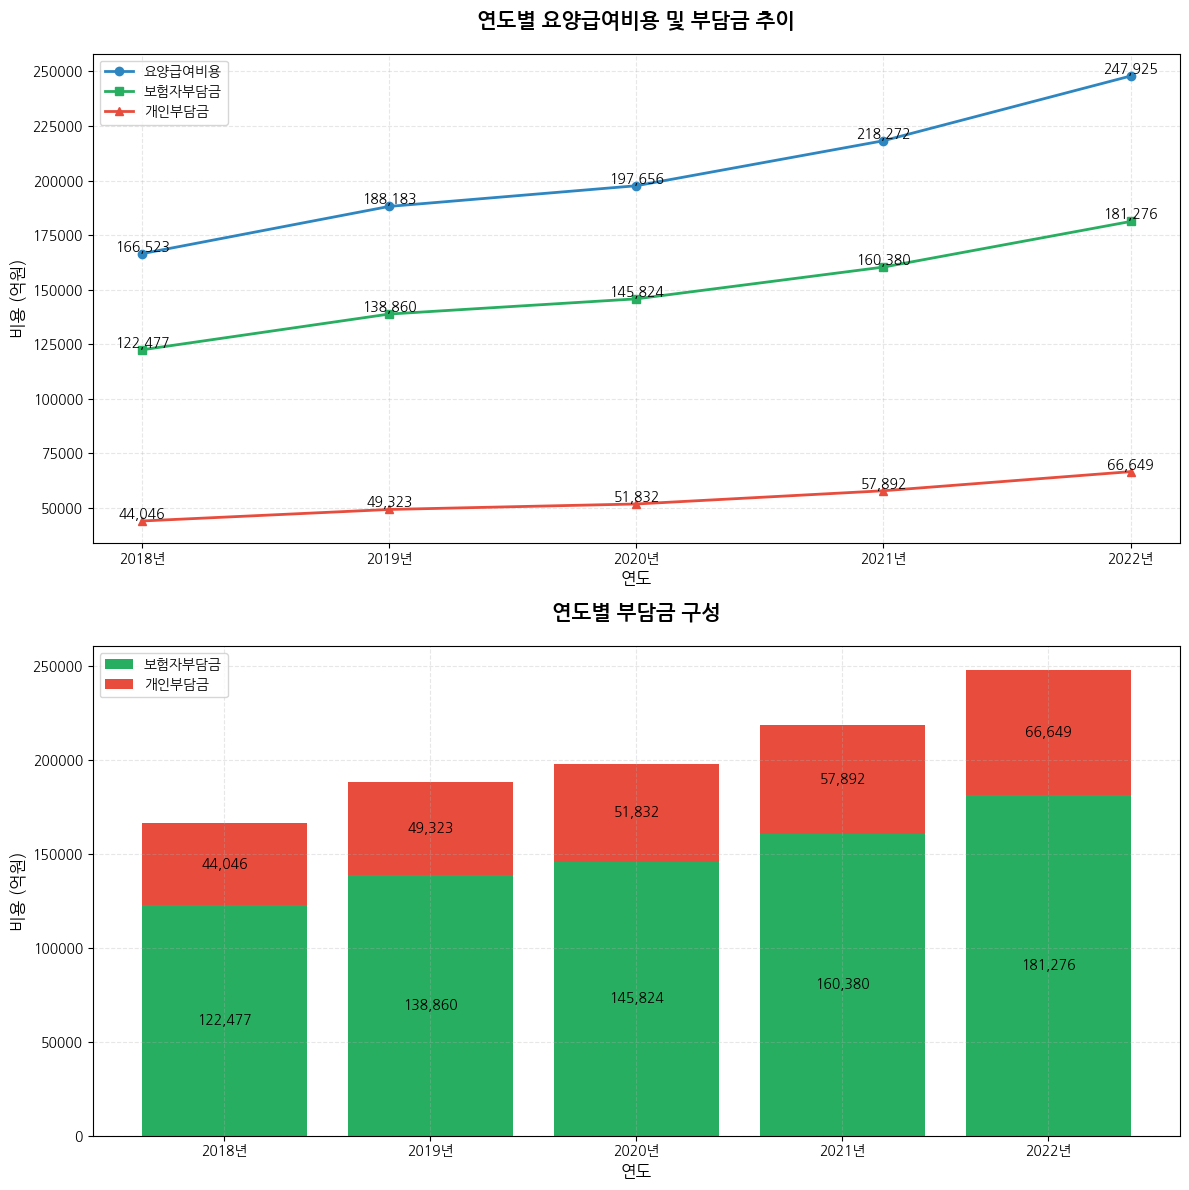


=== 연도별 비용 증가율(%) ===
      연도  요양급여비용 증가율  보험자부담금 증가율
0  2019년       13.01       13.38
1  2020년        5.03        5.02
2  2021년       10.43        9.98
3  2022년       13.59       13.03

=== 연도별 보장성 비율(%) ===
      연도  보장성 비율
0  2018년   73.55
1  2019년   73.79
2  2020년   73.78
3  2021년   73.48
4  2022년   73.12


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
years = ['2018년', '2019년', '2020년', '2021년', '2022년']
care_cost = [166523, 188183, 197656, 218272, 247925]  # 요양급여비용
insurance_cost = [122477, 138860, 145824, 160380, 181276]  # 보험자부담금
personal_cost = np.array(care_cost) - np.array(insurance_cost)  # 개인부담금

# 1. 연도별 비용 추이 그래프
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# 1.1 선 그래프
ax1.plot(years, care_cost, 'o-', linewidth=2, label='요양급여비용', color='#2E86C1')
ax1.plot(years, insurance_cost, 's-', linewidth=2, label='보험자부담금', color='#27AE60')
ax1.plot(years, personal_cost, '^-', linewidth=2, label='개인부담금', color='#E74C3C')

# 값 레이블 표시
for i, (c, ins, p) in enumerate(zip(care_cost, insurance_cost, personal_cost)):
    ax1.text(i, c, f'{c:,}', ha='center', va='bottom')
    ax1.text(i, ins, f'{ins:,}', ha='center', va='bottom')
    ax1.text(i, p, f'{p:,}', ha='center', va='bottom')

ax1.set_title('연도별 요양급여비용 및 부담금 추이', pad=20, fontsize=15, fontweight='bold')
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('비용 (억원)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.legend()

# 1.2 누적 막대 그래프
bottom_bars = ax2.bar(years, insurance_cost, label='보험자부담금', color='#27AE60')
top_bars = ax2.bar(years, personal_cost, bottom=insurance_cost, label='개인부담금', color='#E74C3C')

# 값 레이블 표시
for bars in [bottom_bars, top_bars]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_y() + height/2.,
                f'{int(height):,}',
                ha='center', va='center')

ax2.set_title('연도별 부담금 구성', pad=20, fontsize=15, fontweight='bold')
ax2.set_xlabel('연도', fontsize=12)
ax2.set_ylabel('비용 (억원)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# 2. 기본 통계 출력
print("\n=== 연도별 비용 증가율(%) ===")
care_growth = [(care_cost[i] - care_cost[i-1]) / care_cost[i-1] * 100 for i in range(1, len(care_cost))]
insurance_growth = [(insurance_cost[i] - insurance_cost[i-1]) / insurance_cost[i-1] * 100 for i in range(1, len(insurance_cost))]

stats_df = pd.DataFrame({
    '연도': years[1:],
    '요양급여비용 증가율': care_growth,
    '보험자부담금 증가율': insurance_growth
})
print(stats_df.round(2))

# 3. 보장성 분석
coverage_ratio = np.array(insurance_cost) / np.array(care_cost) * 100
print("\n=== 연도별 보장성 비율(%) ===")
coverage_df = pd.DataFrame({
    '연도': years,
    '보장성 비율': coverage_ratio
})
print(coverage_df.round(2))

## 4. 종별 요양 급여비용 - cate_cost

In [40]:
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/건강보험진료통계/건강보험진료통계-진료항목4대분류별요양기관종별요양급여비용_2022.xlsx'

cate_cost = pd.read_excel(path, engine='openpyxl')

new_columns = cate_cost.iloc[1].values
cate_cost.columns = new_columns
cate_cost = cate_cost.drop([0, 1])
cate_cost = cate_cost.reset_index(drop=True)

cate_cost.head(10)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구분,의료기관구분,요양급여 비용총액,4대분류 계,기본진료료,진료행위료,약품비,재료대,정액수가
0,전체,계,1029770,981212,210433,498493,228936,43350,48558
1,전체,상급종합병원,173013,170048,31753,91226,30124,16945,2965
2,전체,종합병원,173572,170099,36363,100544,19043,14149,3473
3,전체,병원,90799,86239,20430,53550,5041,7219,4559
4,전체,요양병원,56442,29476,14790,13099,1554,33,26966
5,전체,정신병원,6638,6638,4058,1855,723,2,-
6,전체,의원,231199,221671,80918,127679,9568,3505,9528
7,전체,치과병원,3261,3261,723,2406,21,110,-
8,전체,치과의원,50917,50917,9241,40233,119,1324,-
9,전체,한방병원,5739,5739,3207,2449,69,14,-


### 외래 데이터만 출력

In [12]:
df=cate_cost[cate_cost['구분'] == '외래']
df = df.reset_index(drop=True)
display(df)

,구분,의료기관구분,요양급여 비용총액,4대분류 계,기본진료료,진료행위료,약품비,재료대,정액수가
0,외래,계,680711,679650,127566,343018,202110,6956,1062
1,외래,상급종합병원,64810,64810,9013,37174,17819,805,-
2,외래,종합병원,67553,67553,11321,45999,9316,916,-
3,외래,병원,37329,37329,8346,25708,2231,1043,-
4,외래,요양병원,2396,2396,796,1441,154,5,-
5,외래,정신병원,1143,1143,185,448,508,1,-
6,외래,의원,214059,214059,78737,123351,9252,2719,-
7,외래,치과병원,3141,3141,703,2336,14,89,-
8,외래,치과의원,50916,50916,9241,40232,119,1324,-
9,외래,한방병원,1432,1432,407,994,24,7,-


## 5. 지역별 종별 요양기관 수 - instit

In [13]:
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/건강보험진료통계/기관수현황_지역별종별요양기관수_2024년3분기.xlsx'

instit = pd.read_excel(path, engine='openpyxl')

new_columns = instit.iloc[1].values
instit.columns = new_columns
instit = instit.drop([0, 1])
instit = instit.reset_index(drop=True)

instit

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시도,시군구,계,상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원
0,서울특별시,계,24796,14,44,226,109,12,10010,58,4892,3,25,10,-,-,5653,89,3651
1,서울특별시,종로구,678,2,2,3,1,-,208,1,146,-,1,-,-,-,196,2,116
2,서울특별시,중구,767,-,1,3,-,-,284,5,199,1,1,-,-,-,172,1,100
3,서울특별시,용산구,440,-,1,1,-,-,158,-,100,1,1,-,-,-,116,-,62
4,서울특별시,성동구,641,1,1,4,3,-,255,1,125,-,1,-,-,-,155,-,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,전북특별자치도,장수군,42,-,-,-,-,-,7,-,5,-,-,5,11,1,9,-,4
265,전북특별자치도,임실군,81,-,-,1,1,1,15,-,7,-,-,11,20,1,14,-,10
266,전북특별자치도,순창군,76,-,-,1,2,-,16,-,7,-,-,10,17,1,15,-,7
267,전북특별자치도,고창군,118,-,1,1,5,-,29,-,12,-,1,12,24,-,23,-,10


In [14]:
df=instit[instit['시군구'] == '계']
df = df.reset_index(drop=True)
display(df)

,시도,시군구,계,상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,치과의원,조산원,보건소,보건지소,보건진료소,보건의료원,약국,한방병원,한의원
0,서울특별시,계,24796,14,44,226,109,12,10010,58,4892,3,25,10,-,-,5653,89,3651
1,부산광역시,계,7271,4,25,144,161,23,2638,25,1338,1,16,11,5,-,1705,26,1149
2,대구광역시,계,5536,5,14,90,72,16,2026,13,945,-,9,15,18,-,1391,18,904
3,인천광역시,계,5076,3,18,59,63,17,1822,13,1004,1,10,27,25,-,1278,48,688
4,광주광역시,계,3051,2,23,82,60,9,1067,13,645,-,5,2,10,-,726,88,319
5,대전광역시,계,3118,2,8,48,45,7,1136,7,555,1,5,6,7,-,777,15,499
6,울산광역시,계,1865,1,8,32,37,6,643,4,386,-,5,8,11,-,442,7,275
7,세종특별자치시,계,626,-,2,3,3,1,231,1,99,-,1,10,7,-,164,3,101
8,경기도,계,23423,6,66,288,292,53,8301,43,4748,5,48,117,155,1,5795,148,3357
9,충청북도,계,2928,1,12,37,36,12,933,4,474,1,13,94,159,1,731,12,408


In [15]:
# 요양병원, 시도, 시군구, 계만 놔두고 정리

from google.colab import drive
import pandas as pd
from IPython.display import display

columns_to_keep = ['시도', '시군구', '요양병원', '계']
filtered_instit = instit[columns_to_keep]
display(filtered_instit)

,시도,시군구,요양병원,계
0,서울특별시,계,109,24796
1,서울특별시,종로구,1,678
2,서울특별시,중구,-,767
3,서울특별시,용산구,-,440
4,서울특별시,성동구,3,641
...,...,...,...,...
264,전북특별자치도,장수군,-,42
265,전북특별자치도,임실군,1,81
266,전북특별자치도,순창군,2,76
267,전북특별자치도,고창군,5,118


### 지역별로 요양병원 수 정리

In [16]:
instit['요양병원'] = pd.to_numeric(instit['요양병원'], errors='coerce')
instit_sum = instit.groupby('시도')['요양병원'].sum().reset_index()
instit_sum_sorted = instit_sum.sort_values(by='요양병원', ascending=True)

display(instit_sum_sorted)

,시도,요양병원
9,세종특별자치시,6.0
14,제주특별자치도,22.0
0,강원특별자치도,64.0
16,충청북도,72.0
10,울산광역시,74.0
6,대전광역시,90.0
4,광주광역시,120.0
11,인천광역시,126.0
15,충청남도,132.0
5,대구광역시,144.0


In [44]:
import folium
import json
import warnings
warnings.filterwarnings('ignore')

# 대한민국 시도 경계 GeoJSON 파일 로드
geo_path = 'https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json'

# 지도 생성 (대한민국 중심 좌표)
m = folium.Map(location=[36.2, 127.5], zoom_start=7)

# Choropleth 맵 생성
folium.Choropleth(
    geo_data=geo_path,
    name='choropleth',
    data=instit_sum_sorted,
    columns=['시도', '요양병원'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='요양병원 수',
    highlight=True
).add_to(m)

# 각 지역에 요양병원 수 텍스트 추가
style_function = lambda x: {'fillColor': '#ffffff',
                          'color':'#000000',
                          'fillOpacity': 0.1,
                          'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000',
                              'color':'#000000',
                              'fillOpacity': 0.50,
                              'weight': 0.1}

NIL = folium.features.GeoJson(
    geo_path,
    style_function=style_function,
    control=False,
    highlight_function=highlight_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'],
        aliases=['시도: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
m.add_child(NIL)
m.keep_in_front(NIL)

# 각 시도의 중심점에 요양병원 수 표시
for idx, row in instit_sum_sorted.iterrows():
    # 시도별 중심 좌표 (수동으로 정의)
    coordinates = {
        '서울특별시': [37.5665, 126.9780],
        '부산광역시': [35.1796, 129.0756],
        '대구광역시': [35.8714, 128.6014],
        '인천광역시': [37.4563, 126.7052],
        '광주광역시': [35.1595, 126.8526],
        '대전광역시': [36.3504, 127.3845],
        '울산광역시': [35.5384, 129.3114],
        '세종특별자치시': [36.4800, 127.2890],
        '경기도': [37.4138, 127.5183],
        '강원특별자치도': [37.8228, 128.1555],
        '충청북도': [36.6358, 127.4913],
        '충청남도': [36.6588, 126.6728],
        '전라북도': [35.8202, 127.1089],
        '전라남도': [34.8160, 126.4629],
        '경상북도': [36.4919, 128.8889],
        '경상남도': [35.4606, 128.2132],
        '제주특별자치도': [33.4996, 126.5312]
    }


# 범례 추가
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 150px; height: 90px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding: 10px;
            border-radius: 5px;
            ">
<p><strong>요양병원 수</strong></p>
<p style="color:red;">● 많음 (300개 이상)</p>
<p style="color:orange;">● 중간 (100-300개)</p>
<p style="color:yellow;">● 적음 (100개 미만)</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# 지도 저장
m.save('korea_nursing_hospitals.html')

# 지도 표시
m

Output hidden; open in https://colab.research.google.com to view.

## 위탁병원 현황
보훈대상자 중 의료지원대상자에게 진료비 혜택을 제공하는 위탁병원 현황 정보

In [17]:
import pandas as pd

hospital = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/국가보훈부_보훈의료 위탁병원 현황_20231018.csv', encoding='cp949')
hospital.to_csv('hospital.csv', encoding='utf-8')

hospital

,기준일,연번,위탁병원명,종별,병상수,진료과수,광역시도명,시군구명,주소,상세주소,우편번호,전화번호
0,2024-10-18,1,강릉동인병원,종합병원,383,21,강원특별자치도,강릉시,강원특별자치도 강릉시 강릉대로419번길,"42, (포남동)",25478,033-651-6167
1,2024-10-18,2,강릉연세요양병원,요양병원,99,3,강원특별자치도,강릉시,강원특별자치도 강릉시 옥가로,"70, (옥천동)",25552,033-645-1400
2,2024-10-18,3,우리들내과의원,의원,0,4,강원특별자치도,강릉시,강원특별자치도 강릉시 경강로,"2079, 2~5층 (임당동)",25533,033-610-1500
3,2024-10-18,4,이명호내과의원,의원,0,2,강원특별자치도,강릉시,강원특별자치도 강릉시 솔올로5번길,"40, 교동엘림빌딩 2층 (교동)",25515,033-645-7747
4,2024-10-18,5,박정빈외과의원,의원,4,5,강원특별자치도,강릉시,강원특별자치도 강릉시 경강로,"2109, 임당동문선빌딩 3층 (임당동)",25532,033-648-0080
...,...,...,...,...,...,...,...,...,...,...,...,...
841,2024-10-18,842,청주웰치과의원,의원,0,7,충청북도,청주시,충청북도 청주시 흥덕구 2순환로,"1120, 3동 5층 -(비하동)",28363,043-238-9201
842,2024-10-18,843,건국대학교충주병원,종합병원,318,21,충청북도,충주시,충청북도 충주시 국원대로,"82, 교현동 (교현동)",27376,043-840-8200
843,2024-10-18,844,충주시노인전문병원,요양병원,252,5,충청북도,충주시,충청북도 충주시 동량면 충원대로,"1398, (대전리)",27442,043-855-9393
844,2024-10-18,845,송원요양병원,요양병원,195,5,충청북도,충주시,충청북도 충주시 주덕읍 신양로,"62, (신양리)",27462,043-856-3501


### 요양병원만 출력

In [18]:
df=hospital[hospital['종별'] == '요양병원']
df = df.reset_index(drop=True)
display(df)

,기준일,연번,위탁병원명,종별,병상수,진료과수,광역시도명,시군구명,주소,상세주소,우편번호,전화번호
0,2024-10-18,2,강릉연세요양병원,요양병원,99,3,강원특별자치도,강릉시,강원특별자치도 강릉시 옥가로,"70, (옥천동)",25552,033-645-1400
1,2024-10-18,26,바른요양병원,요양병원,238,4,강원특별자치도,원주시,강원특별자치도 원주시 판부면 치악로,"1139, (금대리)",26504,033-762-0100
2,2024-10-18,42,춘천시노인전문병원,요양병원,165,6,강원특별자치도,춘천시,강원특별자치도 춘천시 동면 세실로,"252, 춘천시 동면(만천리)",24216,033-240-7500
3,2024-10-18,72,로하스광명요양병원,요양병원,217,12,경기도,광명시,경기도 광명시 디지털로,"25, 창덕빌딩 3~5층(철산동)",14239,02-2619-0075
4,2024-10-18,96,경기도립노인전문 남양주병원,요양병원,244,6,경기도,남양주시,경기도 남양주시 수동면 외방로172번길,"50, (외방리)",12025,031-590-5000
5,2024-10-18,98,경기도립노인전문동두천병원,요양병원,197,4,경기도,동두천시,경기도 동두천시 탑신로,"536, (탑동동)",11322,031-860-4114
6,2024-10-18,102,메디홀스요양병원,요양병원,348,6,경기도,부천시,경기도 부천시 소사구 경인로110번길,"14, (송내동)",14727,032-667-0100
7,2024-10-18,107,분당센트럴요양병원,요양병원,164,9,경기도,성남시,경기도 성남시 분당구 양현로94번길,"17, 1층 5호 지층(이매동)",13568,031-706-9090
8,2024-10-18,122,(의)자운의료재단강남요양병원,요양병원,75,8,경기도,시흥시,경기도 시흥시 수인로3325번길,"10, 3층 우명프라자(신천동, 우명프라자)",14950,031-311-0700
9,2024-10-18,123,센트럴요양병원,요양병원,150,5,경기도,시흥시,경기도 시흥시 공단1대로,"237, 3~8층 B동 (정왕동)",15079,031-8041-3799


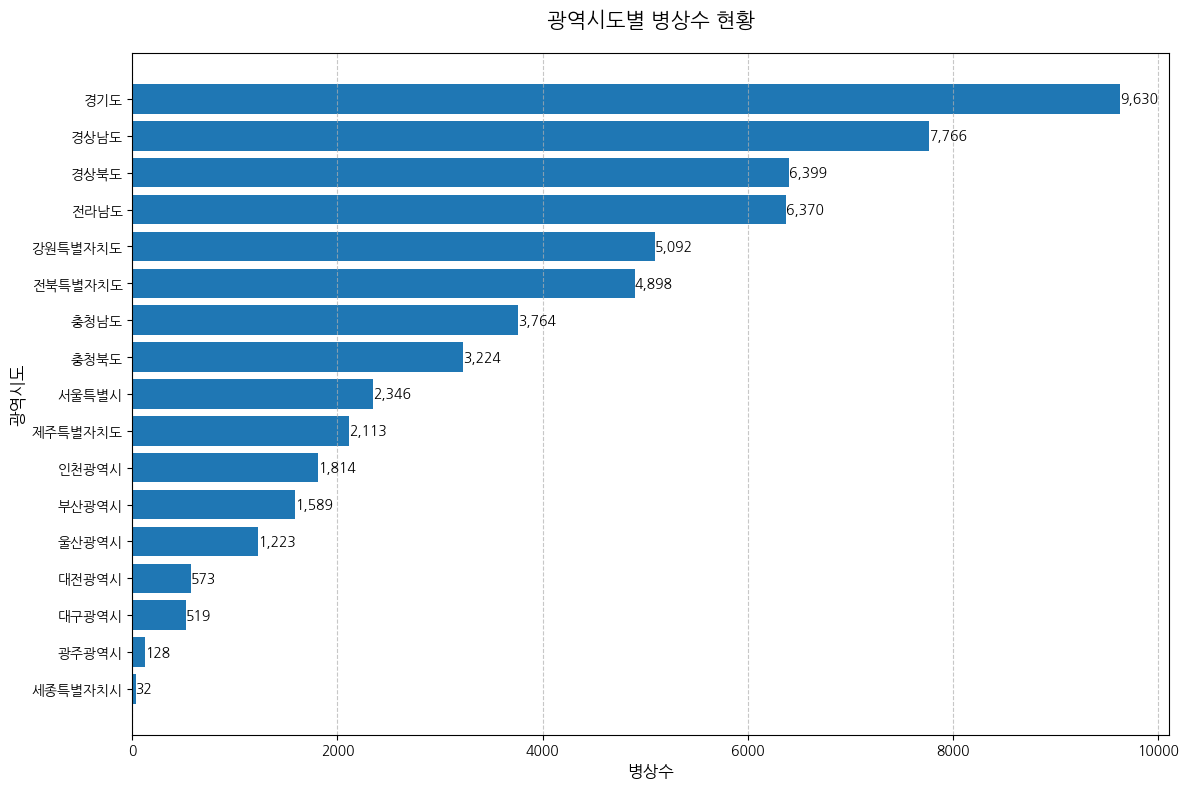


=== 광역시도별 병상수 통계 ===


,병상수,비율(%)
광역시도명,,
경기도,9630,16.75
경상남도,7766,13.51
경상북도,6399,11.13
전라남도,6370,11.08
강원특별자치도,5092,8.86
전북특별자치도,4898,8.52
충청남도,3764,6.55
충청북도,3224,5.61
서울특별시,2346,4.08


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
city_beds = hospital.groupby('광역시도명')['병상수'].sum().sort_values(ascending=True)

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 가로 막대 그래프 생성
bars = plt.barh(city_beds.index, city_beds.values)

# 제목과 레이블 설정
plt.title('광역시도별 병상수 현황', pad=20, fontsize=15)
plt.xlabel('병상수', fontsize=12)
plt.ylabel('광역시도', fontsize=12)

# 막대 끝에 값 표시
for i, v in enumerate(city_beds.values):
    plt.text(v, i, f'{v:,.0f}', va='center', fontsize=10)

# 그리드 추가
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 상세 통계 출력
city_stats = pd.DataFrame({
    '병상수': city_beds,
    '비율(%)': (city_beds / city_beds.sum() * 100).round(2)
}).sort_values('병상수', ascending=False)

print("\n=== 광역시도별 병상수 통계 ===")
display(city_stats)

## 장기요양 등급판정
노인장기요양보험 시군구별 등급판정 현황에 대한 데이터로 성별, 연령별, 자격별 장기요양 등급판정 현황

In [41]:
rates = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/국민건강보험공단_노인장기요양보험 등급판정 현황_20240930.csv', encoding='cp949')
rates.to_csv('rates.csv', encoding='utf-8')

rates

,시도,시군구,자격별,성별,연령구분,신청자,1등급,2등급,3등급,4등급,5등급,인지지원등급,등급외A,등급외B,등급외C
0,서울,종로구,기초,남자,65세미만,18,1,0,4,7,0,0,1,1,0
1,서울,종로구,기초,남자,65-69세,25,0,1,2,6,2,2,3,2,0
2,서울,종로구,기초,남자,70-74세,18,1,0,2,3,0,0,5,3,1
3,서울,종로구,기초,남자,75-79세,19,1,1,2,6,2,0,0,1,0
4,서울,종로구,기초,남자,80-84세,13,0,1,1,6,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10548,제주,서귀포시,의료,여자,65-69세,1,0,0,0,0,0,0,0,1,0
10549,제주,서귀포시,의료,여자,70-74세,2,0,0,1,1,0,0,0,0,0
10550,제주,서귀포시,의료,여자,75-79세,6,0,0,0,3,0,0,2,1,0
10551,제주,서귀포시,의료,여자,80-84세,10,0,1,1,2,2,0,0,2,1


### 연령별 등급정보

<Figure size 1500x800 with 0 Axes>

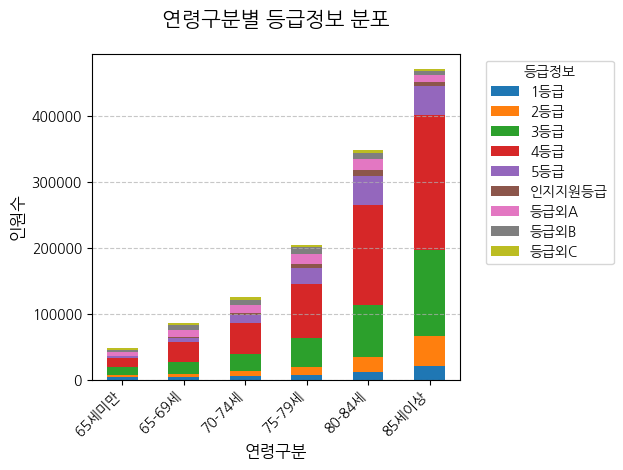


=== 연령구분별 등급정보 통계 ===


,1등급,2등급,3등급,4등급,5등급,인지지원등급,등급외A,등급외B,등급외C
연령구분,,,,,,,,,
65세미만,4269,3913,11275,13290,3124,912,6222,2855,2062
65-69세,4257,5371,17726,29850,6389,1940,10750,6816,3678
70-74세,5287,7723,26304,47281,11765,3257,12074,7925,3324
75-79세,7626,12667,43004,82287,23666,5944,15926,9974,3707
80-84세,11988,23445,78241,150651,44075,9002,16876,9952,3550
85세이상,21092,45870,130666,203737,43374,6201,11524,6236,1958


<Figure size 1500x800 with 0 Axes>

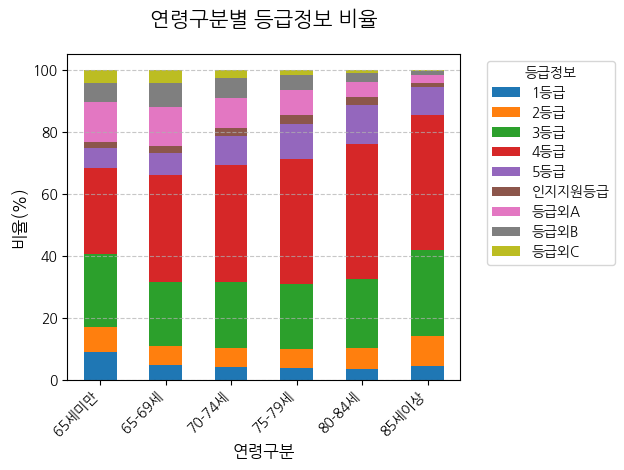


=== 연령구분별 등급정보 비율(%) ===


,1등급,2등급,3등급,4등급,5등급,인지지원등급,등급외A,등급외B,등급외C
연령구분,,,,,,,,,
65세미만,8.91,8.17,23.53,27.73,6.52,1.90,12.98,5.96,4.30
65-69세,4.91,6.19,20.43,34.40,7.36,2.24,12.39,7.85,4.24
70-74세,4.23,6.18,21.05,37.84,9.42,2.61,9.66,6.34,2.66
75-79세,3.72,6.19,21.00,40.18,11.56,2.90,7.78,4.87,1.81
80-84세,3.45,6.74,22.50,43.32,12.67,2.59,4.85,2.86,1.02
85세이상,4.48,9.75,27.76,43.29,9.22,1.32,2.45,1.32,0.42


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 연령구분별 각 등급의 합계 계산
grade_columns = ['1등급', '2등급', '3등급', '4등급', '5등급', '인지지원등급', '등급외A', '등급외B', '등급외C']
age_grade = rates.groupby('연령구분')[grade_columns].sum()

# 연령 순서 지정
age_order = ['65세미만', '65-69세', '70-74세', '75-79세', '80-84세', '85세이상']
age_grade = age_grade.reindex(age_order)

# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 누적 막대 그래프 생성
age_grade.plot(kind='bar', stacked=True)

# 제목과 레이블 설정
plt.title('연령구분별 등급정보 분포', pad=20, fontsize=15)
plt.xlabel('연령구분', fontsize=12)
plt.ylabel('인원수', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 범례 위치 조정
plt.legend(title='등급정보', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 상세 통계 출력
print("\n=== 연령구분별 등급정보 통계 ===")
display(age_grade)

# 비율로 보기
age_grade_pct = age_grade.div(age_grade.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
age_grade_pct.plot(kind='bar', stacked=True)
plt.title('연령구분별 등급정보 비율', pad=20, fontsize=15)
plt.xlabel('연령구분', fontsize=12)
plt.ylabel('비율(%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='등급정보', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 비율 통계 출력
print("\n=== 연령구분별 등급정보 비율(%) ===")
display(age_grade_pct.round(2))

## 요양기관 수진자 기본정보
국민건강보험 가입자 중 요양기관(병/의원 등)으로부터의 진료이력이 있는 각 연도별 수진자 100만 명에 대한
기본정보(성, 연령대, 시도코드 등)와 진료내역(진료과목코드, 주상병코드, 요양일수, 총처방일수 등)으로 구성된 데이터

In [22]:
import pandas as pd
basedf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/메타포3조/메타포DA/데이터/국민건강보험공단_진료내역정보_2023.CSV', encoding='cp949')
basedf.to_csv('basedf.csv', encoding='utf-8')

print(basedf.head(3))

   기준년도  가입자일련번호  진료내역일련번호  성별코드  연령대코드  시도코드      요양개시일자  서식코드  진료과목코드 주상병코드  \
0  2023   416815   2667446     2     14    26  2023-02-02     3       1  J209   
1  2023   607165   2669619     1     14    28  2023-02-06     3       1  J209   
2  2023   301410   2680722     1     14    41  2023-02-02     3       1  J209   

  부상병코드  요양일수  입내원일수  심결가산율  심결요양급여비용총액  심결본인부담금  심결보험자부담금  총처방일수  
0  J304     1      1   0.15       12380     1500     10880      4  
1  J304     1      1   0.15       12380     1500     10880      5  
2  J304     1      1   0.15       12380     1500     10880      3  


In [23]:
display(basedf.head())

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수
0,2023,416815,2667446,2,14,26,2023-02-02,3,1,J209,J304,1,1,0.15,12380,1500,10880,4
1,2023,607165,2669619,1,14,28,2023-02-06,3,1,J209,J304,1,1,0.15,12380,1500,10880,5
2,2023,301410,2680722,1,14,41,2023-02-02,3,1,J209,J304,1,1,0.15,12380,1500,10880,3
3,2023,193953,2682490,2,14,26,2023-02-28,3,1,J209,J304,1,1,0.15,12380,1500,10880,3
4,2023,859131,2684667,1,14,41,2023-02-15,3,1,J209,J304,1,1,0.15,12380,1500,10880,2


In [24]:
# 연령대 매핑 딕셔너리 생성
age_mapping = {
    1: '0~4세',
    2: '5~9세',
    3: '10~14세',
    4: '15~19세',
    5: '20~24세',
    6: '25~29세',
    7: '30~34세',
    8: '35~39세',
    9: '40~44세',
    10: '45~49세',
    11: '50~54세',
    12: '55~59세',
    13: '60~64세',
    14: '65~69세',
    15: '70~74세',
    16: '75~79세',
    17: '80~84세',
    18: '85세+'
}

# 연령대코드를 실제 연령대로 변경
basedf['연령대'] = basedf['연령대코드'].map(age_mapping)

In [25]:
# 매핑 딕셔너리 생성
# 성별 매핑
gender_mapping = {
    1: '남자',
    2: '여자'
}

# 시도 매핑
city_mapping = {
    11: '서울특별시', 26: '부산광역시', 27: '대구광역시', 28: '인천광역시',
    29: '광주광역시', 30: '대전광역시', 31: '울산광역시', 36: '세종특별자치시',
    41: '경기도', 42: '강원도', 43: '충청북도', 44: '충청남도',
    45: '전라북도', 46: '전라남도', 47: '경상북도', 48: '경상남도',
    49: '제주특별자치도'
}

# 진료과목 매핑
dept_mapping = {
    0: '일반의', 1: '내과', 2: '신경과', 3: '정신과', 4: '외과',
    5: '정형외과', 6: '신경외과', 7: '흉부외과', 8: '성형외과',
    9: '마취통증의학과', 10: '산부인과', 11: '소아청소년과', 12: '안과',
    13: '이비인후과', 14: '피부과', 15: '비뇨기과', 16: '영상의학과',
    17: '방사선 종양학과', 18: '병리과', 19: '진단검사의학과', 20: '결핵과',
    21: '재활의학과', 22: '핵의학과', 23: '가정의학과', 24: '응급의학과',
    25: '산업의학과', 26: '예방의학과', 50: '구강악안면외과', 51: '치과보철과',
    52: '치과교정과', 53: '소아치과', 54: '치주과', 55: '치과보존과',
    56: '구강내과', 57: '구강악안면방사선과', 58: '구강병리과', 59: '예방치과',
    80: '한방내과', 81: '한방부인과', 82: '한방소아과', 83: '한방안과, 이비인',
    84: '한방신경정신과', 85: '침구과', 86: '한방재활의학과', 87: '사상체질과',
    88: '한방응급', 'ZZ': '결측', '-': '정상 또는 해당사항 없음'
}

# 데이터프레임에 새로운 열 추가
basedf['성별'] = basedf['성별코드'].map(gender_mapping)
basedf['시도명'] = basedf['시도코드'].map(city_mapping)
basedf['진료과목명'] = basedf['진료과목코드'].map(dept_mapping)

In [26]:
display(basedf.head())

,기준년도,가입자일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,...,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,연령대,성별,시도명,진료과목명
0,2023,416815,2667446,2,14,26,2023-02-02,3,1,J209,...,1,0.15,12380,1500,10880,4,65~69세,여자,부산광역시,내과
1,2023,607165,2669619,1,14,28,2023-02-06,3,1,J209,...,1,0.15,12380,1500,10880,5,65~69세,남자,인천광역시,내과
2,2023,301410,2680722,1,14,41,2023-02-02,3,1,J209,...,1,0.15,12380,1500,10880,3,65~69세,남자,경기도,내과
3,2023,193953,2682490,2,14,26,2023-02-28,3,1,J209,...,1,0.15,12380,1500,10880,3,65~69세,여자,부산광역시,내과
4,2023,859131,2684667,1,14,41,2023-02-15,3,1,J209,...,1,0.15,12380,1500,10880,2,65~69세,남자,경기도,내과


● 심결요양급여비용총액은 정산심사결과 수진자 본인이 부담해야 될 금액인「심결본인부담금」과 보험자가 부담해야 할 「심결 보험자부담금」합친 금액
● 요양개시일자 기준으로 종별 규모에 따라 시설, 인력, 장비 등의 투자비용 등을 고려하여 요양기관 종별에 따라 가산 적용되는 진료비의 가산율(%)
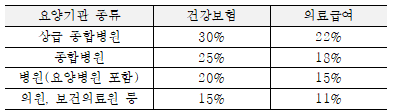


In [27]:
columns_to_drop = ['진료과목코드', '부상병코드', '가입자일련번호', '진료내역일련번호', '성별코드', '연령대코드', '시도코드', '요양개시일자', '서식코드', '주상병코드', '입내원일수', '총처방일수']
basedf = basedf.drop(columns=columns_to_drop, errors='ignore')

display(basedf.head())

,기준년도,요양일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,연령대,성별,시도명,진료과목명
0,2023,1,0.15,12380,1500,10880,65~69세,여자,부산광역시,내과
1,2023,1,0.15,12380,1500,10880,65~69세,남자,인천광역시,내과
2,2023,1,0.15,12380,1500,10880,65~69세,남자,경기도,내과
3,2023,1,0.15,12380,1500,10880,65~69세,여자,부산광역시,내과
4,2023,1,0.15,12380,1500,10880,65~69세,남자,경기도,내과


In [28]:
display(basedf.tail())

,기준년도,요양일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,연령대,성별,시도명,진료과목명
13831377,2023,1,0.30,1116320,55810,1060510,80~84세,남자,경상북도,비뇨기과
13831378,2023,7,0.25,2848300,185610,2662690,80~84세,남자,경상북도,비뇨기과
13831379,2023,3,0.20,1673920,82920,1591000,30~34세,여자,서울특별시,산부인과
13831380,2023,7,0.20,703400,5720,697680,0~4세,여자,서울특별시,소아청소년과
13831381,2023,7,0.25,3531200,339190,3192010,50~54세,남자,경기도,비뇨기과


### 총비용 계산
총비용(가산포함)=기본비용×(1+심결가산율)

In [29]:
# 총비용(가산포함) 계산
basedf['총비용(가산포함)'] = basedf['심결요양급여비용총액'] * (1 + basedf['심결가산율'])

# 결과 확인 (소수점 반올림)
basedf['총비용(가산포함)'] = basedf['총비용(가산포함)'].round(0)

# 결과 출력
print("계산 결과:")
print(basedf[['심결요양급여비용총액', '심결가산율', '총비용(가산포함)']].head())

# 기본 통계량 확인
print("\n총비용(가산포함) 기본 통계:")
print(basedf['총비용(가산포함)'].describe())

계산 결과:
   심결요양급여비용총액  심결가산율  총비용(가산포함)
0       12380   0.15    14237.0
1       12380   0.15    14237.0
2       12380   0.15    14237.0
3       12380   0.15    14237.0
4       12380   0.15    14237.0

총비용(가산포함) 기본 통계:
count    1.383138e+07
mean     1.255802e+05
std      9.981166e+05
min      1.200000e+01
25%      1.735400e+04
50%      2.279300e+04
75%      5.240500e+04
max      5.023783e+08
Name: 총비용(가산포함), dtype: float64


#### 연령대별 평균 총비용, 진료과목별 평균 총비용

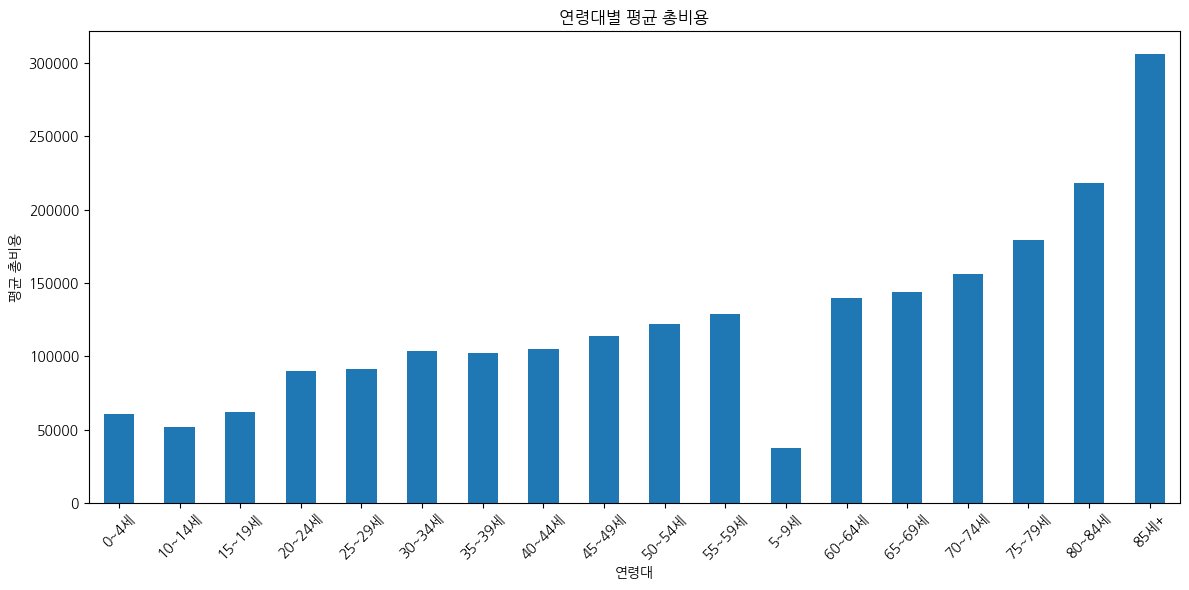

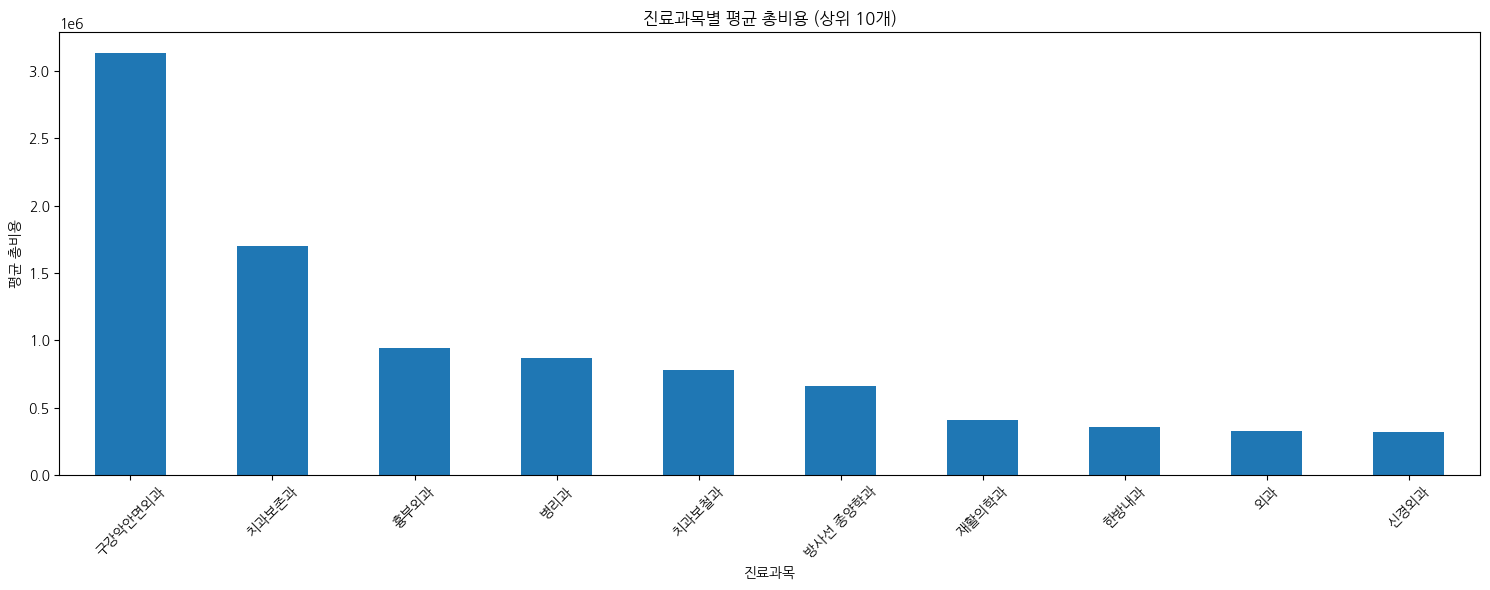

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 연령대별 평균 총비용
plt.figure(figsize=(12, 6))
basedf.groupby('연령대')['총비용(가산포함)'].mean().plot(kind='bar')
plt.title('연령대별 평균 총비용')
plt.xlabel('연령대')
plt.ylabel('평균 총비용')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 진료과목별 평균 총비용 (상위 10개)
plt.figure(figsize=(15, 6))
basedf.groupby('진료과목명')['총비용(가산포함)'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('진료과목별 평균 총비용 (상위 10개)')
plt.xlabel('진료과목')
plt.ylabel('평균 총비용')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

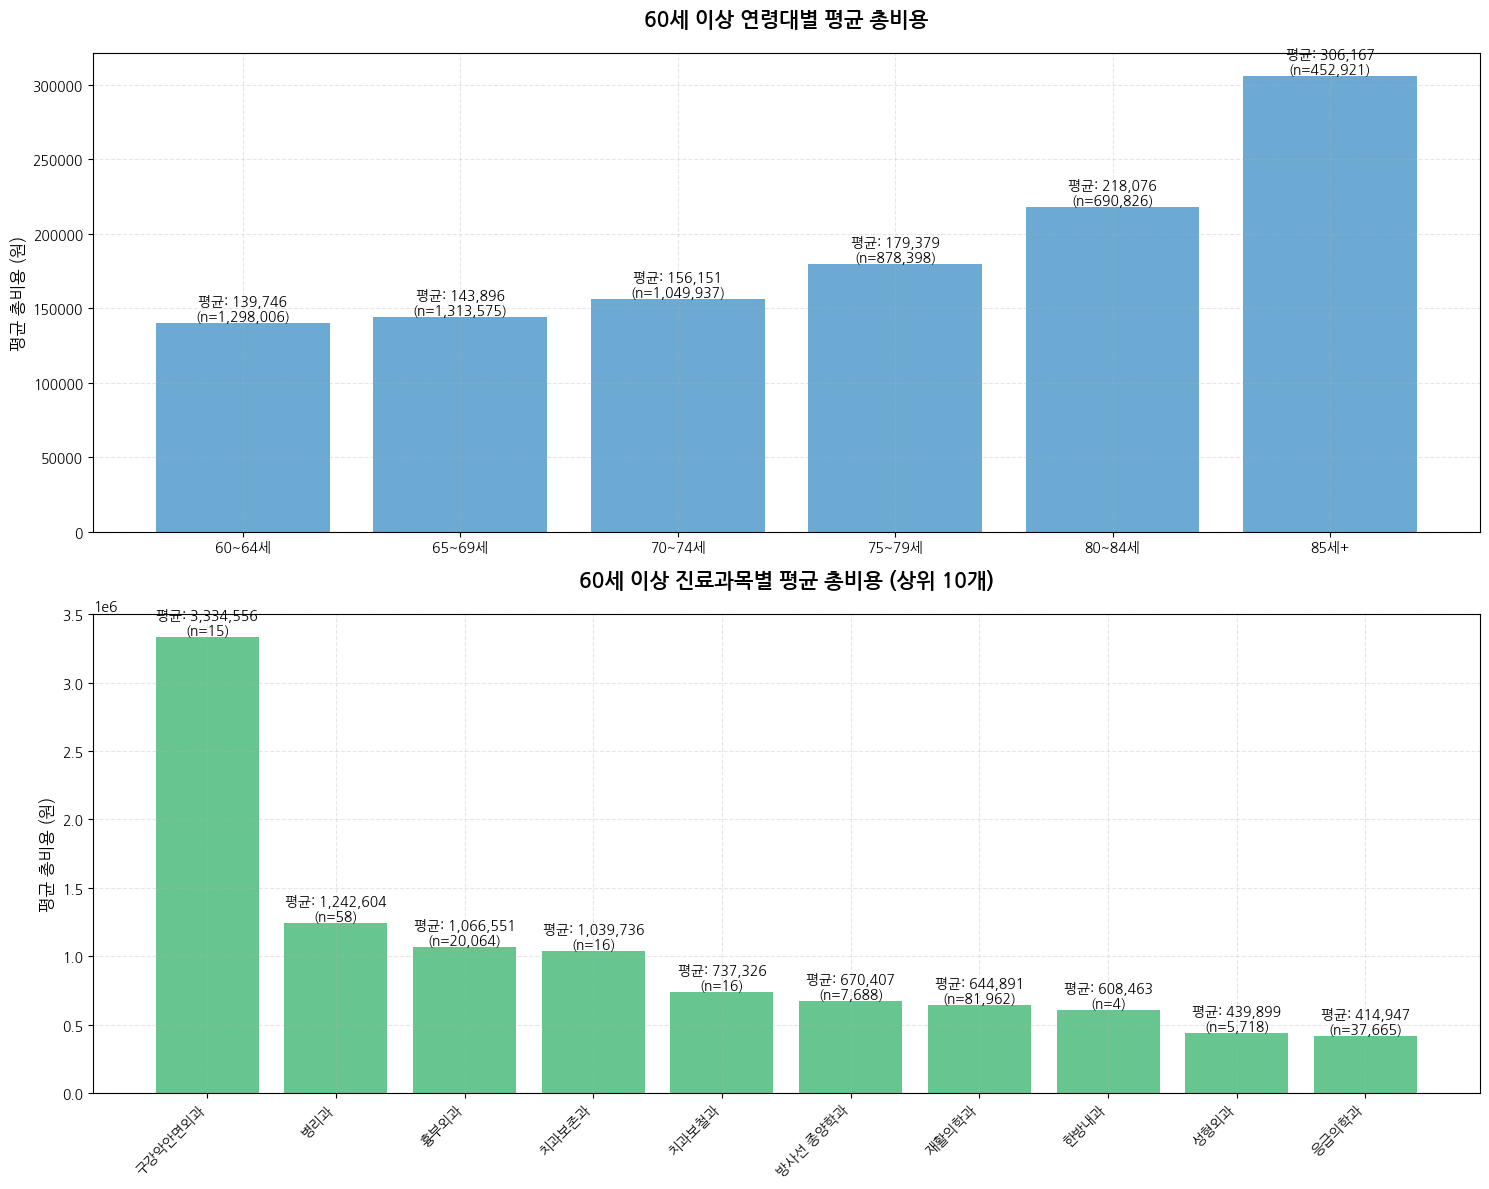


=== 60세 이상 연령대별 총비용 통계 ===
            mean    count        std
연령대                                 
60~64세  139746.0  1298006  1037827.0
65~69세  143896.0  1313575  1159591.0
70~74세  156151.0  1049937  1130552.0
75~79세  179379.0   878398  1346281.0
80~84세  218076.0   690826  1388587.0
85세+    306167.0   452921  1489309.0

=== 60세 이상 진료과목별 총비용 통계 (상위 10개) ===
               mean  count
진료과목명                     
구강악안면외과   3334556.0     15
병리과       1242604.0     58
흉부외과      1066551.0  20064
치과보존과     1039736.0     16
치과보철과      737326.0     16
방사선 종양학과   670407.0   7688
재활의학과      644891.0  81962
한방내과       608463.0      4
성형외과       439899.0   5718
응급의학과      414947.0  37665


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 60세 이상 데이터 필터링
elderly_df = basedf[basedf['연령대'].isin(['60~64세', '65~69세', '70~74세', '75~79세', '80~84세', '85세+'])]

# 그래프 크기 설정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 1. 연령대별 평균 총비용
age_means = elderly_df.groupby('연령대')['총비용(가산포함)'].agg(['mean', 'count', 'std']).round(0)
age_means = age_means.sort_index()  # 연령대 순서대로 정렬

bars1 = ax1.bar(range(len(age_means)), age_means['mean'], color='#2E86C1', alpha=0.7)
ax1.set_title('60세 이상 연령대별 평균 총비용', pad=20, fontsize=15, fontweight='bold')
ax1.set_xticks(range(len(age_means)))
ax1.set_xticklabels(age_means.index, rotation=0)
ax1.set_ylabel('평균 총비용 (원)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.3)

# 값 레이블 표시 (평균값과 데이터 수)
for i, (mean, count) in enumerate(zip(age_means['mean'], age_means['count'])):
    ax1.text(i, mean, f'평균: {mean:,.0f}\n(n={count:,})',
             ha='center', va='bottom', fontsize=10)

# 2. 진료과목별 평균 총비용 (상위 10개)
dept_means = elderly_df.groupby('진료과목명')['총비용(가산포함)'].agg(['mean', 'count']).round(0)
dept_means = dept_means.sort_values('mean', ascending=False).head(10)

bars2 = ax2.bar(range(len(dept_means)), dept_means['mean'], color='#27AE60', alpha=0.7)
ax2.set_title('60세 이상 진료과목별 평균 총비용 (상위 10개)', pad=20, fontsize=15, fontweight='bold')
ax2.set_xticks(range(len(dept_means)))
ax2.set_xticklabels(dept_means.index, rotation=45, ha='right')
ax2.set_ylabel('평균 총비용 (원)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3)

# 값 레이블 표시 (평균값과 데이터 수)
for i, (mean, count) in enumerate(zip(dept_means['mean'], dept_means['count'])):
    ax2.text(i, mean, f'평균: {mean:,.0f}\n(n={count:,})',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 상세 통계 출력
print("\n=== 60세 이상 연령대별 총비용 통계 ===")
print(age_means)

print("\n=== 60세 이상 진료과목별 총비용 통계 (상위 10개) ===")
print(dept_means)